In [361]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [362]:
import matplotlib
matplotlib.__version__

'3.10.5'

In [363]:
print(pd.__version__, np.__version__)

2.3.2 2.3.2


In [364]:
df = pd.read_csv("brain_stroke.csv")


In [365]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,NaN,81.0,0.0,0.0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4976 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4980 non-null   float64
 3   heart_disease      4979 non-null   float64
 4   ever_married       4975 non-null   object 
 5   work_type          4971 non-null   object 
 6   Residence_type     4973 non-null   object 
 7   avg_glucose_level  4975 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4976 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 428.2+ KB


In [367]:
df.isnull().sum() # checking missing values

gender                5
age                   0
hypertension          1
heart_disease         2
ever_married          6
work_type            10
Residence_type        8
avg_glucose_level     6
bmi                   0
smoking_status        5
stroke                0
dtype: int64

In [368]:
# Spliting the Datasets in to  the X and y
X = df.drop(columns=['stroke'])
y = df["stroke"]

In [369]:
# spliting data into training and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [370]:
y_train.value_counts()

stroke
0    3788
1     196
Name: count, dtype: int64

In [371]:
# 1. Set the conditions
cond0 = y_train == 0   # majority class
cond1 = y_train == 1   # minority class

# 2. Sample majority class, keep all minority
y_train_0 = y_train[cond0].sample(n=196, random_state=999)
y_train_1 = y_train[cond1]  # 192 samples

# 3. Concatenate them
y_train = pd.concat([y_train_0, y_train_1])

# 4. Check distribution
print(y_train.value_counts())

stroke
0    196
1    196
Name: count, dtype: int64


In [372]:
X_train = X_train.loc[y_train.index]

In [373]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 4513 to 122
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             388 non-null    object 
 1   age                392 non-null    float64
 2   hypertension       392 non-null    float64
 3   heart_disease      392 non-null    float64
 4   ever_married       392 non-null    object 
 5   work_type          388 non-null    object 
 6   Residence_type     388 non-null    object 
 7   avg_glucose_level  391 non-null    float64
 8   bmi                392 non-null    float64
 9   smoking_status     389 non-null    object 
dtypes: float64(5), object(5)
memory usage: 33.7+ KB


In [374]:
X_train.isnull().sum()

gender               4
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            4
Residence_type       4
avg_glucose_level    1
bmi                  0
smoking_status       3
dtype: int64

In [375]:
# missing values in X_test

X_test.isnull().sum()

gender               1
age                  0
hypertension         0
heart_disease        2
ever_married         2
work_type            3
Residence_type       3
avg_glucose_level    2
bmi                  0
smoking_status       0
dtype: int64

In [376]:
# Inputing the missing values in X_train. 
X_train.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [377]:
X_train['gender'].value_counts(dropna=False, normalize=True)

gender
Female    0.568878
Male      0.420918
NaN       0.010204
Name: proportion, dtype: float64

In [378]:
X_test['gender'].value_counts(dropna=False, normalize=True)


gender
Female    0.565697
Male      0.433300
NaN       0.001003
Name: proportion, dtype: float64

In [379]:
X_train['gender'] = X_train['gender'].fillna(X_train['gender'].mode()[0])
X_test['gender'] = X_test['gender'].fillna(X_test['gender'].mode()[0])


In [380]:
X_test.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3331,Female,50.0,0.0,0.0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked
1095,Male,73.0,1.0,1.0,Yes,Self-employed,Rural,230.68,37.7,Unknown


In [381]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])

In [382]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4513,1,66.0,0.0,0.0,Yes,Private,Rural,67.92,31.1,formerly smoked
3844,0,78.0,0.0,0.0,Yes,Self-employed,Rural,208.99,31.4,formerly smoked


In [383]:
X_train.heart_disease.unique()
X_train['heart_disease'].value_counts(dropna=False, normalize=True)

heart_disease
0.0    0.882653
1.0    0.117347
Name: proportion, dtype: float64

In [384]:
X_test['heart_disease'].value_counts(dropna=False, normalize=True)


heart_disease
0.0    0.946841
1.0    0.051153
NaN    0.002006
Name: proportion, dtype: float64

In [385]:
X_train['heart_disease'] = X_train['heart_disease'].fillna(X_train['heart_disease'].mode()[0])
X_test['heart_disease'] = X_test['heart_disease'].fillna(X_test['heart_disease'].mode()[0])

In [386]:
X_train.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', nan],
      dtype=object)

In [387]:
X_train['work_type'].value_counts(dropna=False, normalize=True)

work_type
Private          0.604592
Self-employed    0.206633
Govt_job         0.104592
children         0.073980
NaN              0.010204
Name: proportion, dtype: float64

In [388]:
X_test['work_type'].value_counts(dropna=False, normalize=True)

work_type
Private          0.556670
Self-employed    0.155466
Govt_job         0.146439
children         0.138415
NaN              0.003009
Name: proportion, dtype: float64

In [389]:
X_train['work_type'] = X_train['work_type'].fillna(X_train['work_type'].mode()[0])
X_test['work_type'] = X_test['work_type'].fillna(X_test['work_type'].mode()[0])

In [390]:
# One-hot encode and drop the first category per feature
X_train = pd.get_dummies(X_train, columns=['work_type', 'smoking_status'], drop_first=True)

# Apply the same to test set
X_test = pd.get_dummies(X_test, columns=['work_type', 'smoking_status'], drop_first=True)

# Align test set to train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [391]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4513,1,66.0,0.0,0.0,Yes,Rural,67.92,31.1,True,False,False,True,False,False
3844,0,78.0,0.0,0.0,Yes,Rural,208.99,31.4,False,True,False,True,False,False


In [392]:
X_train.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    4
avg_glucose_level                 1
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [393]:
X_train.Residence_type.unique()

array(['Rural', 'Urban', nan], dtype=object)

In [394]:
X_train['Residence_type'].value_counts(dropna=False, normalize=True)

Residence_type
Urban    0.510204
Rural    0.479592
NaN      0.010204
Name: proportion, dtype: float64

In [395]:
X_train['Residence_type'] = X_train['Residence_type'].fillna(X_train['Residence_type'].mode()[0])
X_test['Residence_type'] = X_test['Residence_type'].fillna(X_test['Residence_type'].mode()[0])

In [396]:
X_train = pd.get_dummies(X_train, columns=['Residence_type'],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Residence_type'],drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [397]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
4513,1,66.0,0.0,0.0,Yes,67.92,31.1,True,False,False,True,False,False,False
3844,0,78.0,0.0,0.0,Yes,208.99,31.4,False,True,False,True,False,False,False


In [398]:
X_test.head(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
3331,0,50.0,0.0,0.0,Yes,69.92,18.7,False,True,False,True,False,False,True
1095,1,73.0,1.0,1.0,Yes,230.68,37.7,False,True,False,False,False,False,False


In [399]:
X_train.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 1
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Residence_type_Urban              0
dtype: int64

In [400]:
X_train.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 1
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Residence_type_Urban              0
dtype: int64

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

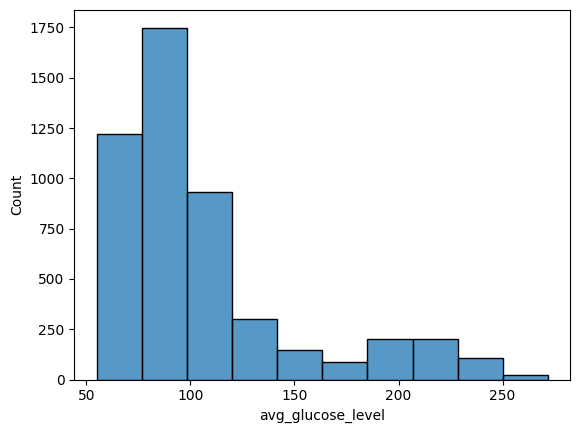

In [401]:
sns.histplot(x = df.avg_glucose_level, bins = 10)

In [402]:
X_train['avg_glucose_level'] = X_train['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median())
X_test['avg_glucose_level'] = X_test['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median())

In [403]:
X_train.isnull().sum()
X_test.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      2
avg_glucose_level                 0
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Residence_type_Urban              0
dtype: int64

In [404]:
X_train.ever_married.unique()
X_train['ever_married'].value_counts(dropna=False, normalize=True)

ever_married
Yes    0.790816
No     0.209184
Name: proportion, dtype: float64

In [405]:
X_train.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Residence_type_Urban              0
dtype: int64

In [406]:
X_test.ever_married.unique()
X_test['ever_married'].value_counts(dropna=False, normalize=True)

ever_married
Yes    0.646941
No     0.351053
NaN    0.002006
Name: proportion, dtype: float64

In [407]:
X_train['ever_married'] = X_train['ever_married'].fillna(X_train['ever_married'].mode()[0])
X_test['ever_married'] = X_test['ever_married'].fillna(X_test['ever_married'].mode()[0])

In [408]:
X_train.isnull().sum()


gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Residence_type_Urban              0
dtype: int64

In [409]:
X_test.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Residence_type_Urban              0
dtype: int64

In [410]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
4513,1,66.0,0.0,0.0,Yes,67.92,31.1,True,False,False,True,False,False,False
3844,0,78.0,0.0,0.0,Yes,208.99,31.4,False,True,False,True,False,False,False


In [411]:
X_test.head(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
3331,0,50.0,0.0,0.0,Yes,69.92,18.7,False,True,False,True,False,False,True
1095,1,73.0,1.0,1.0,Yes,230.68,37.7,False,True,False,False,False,False,False


In [412]:
## Now scaling the Age, ave_glucose_lelvel, bmi

<Axes: xlabel='age', ylabel='Count'>

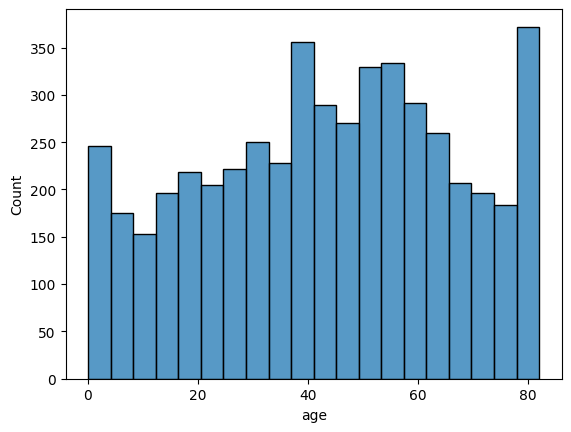

In [413]:
sns.histplot(x = df.age, bins = 20)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

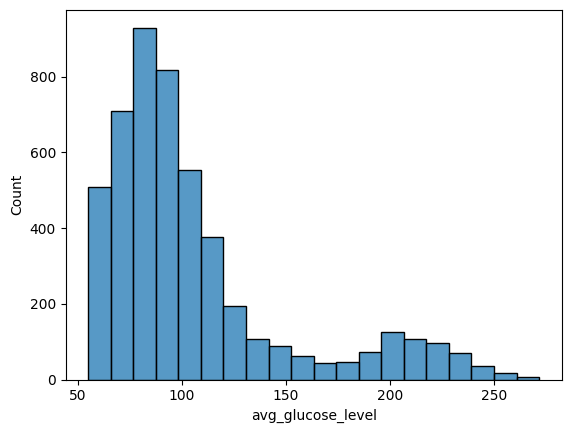

In [414]:
sns.histplot(x = df.avg_glucose_level, bins = 20)

<Axes: xlabel='bmi', ylabel='Count'>

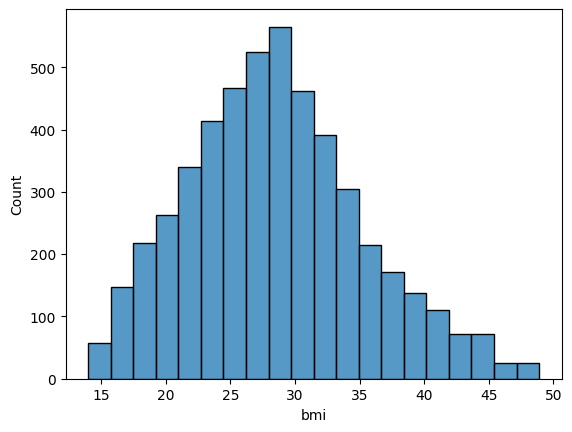

In [415]:
sns.histplot(x = df.bmi, bins = 20)


In [416]:
# from sklearn.preprocessing import StandardScaler

# # Create scaler
# bmi_scaler = StandardScaler()

# # Fit on training data and transform
# X_train['bmi'] = bmi_scaler.fit_transform(X_train[['bmi']])

# # Transform test data (use the same scaler)
# X_test['bmi'] = bmi_scaler.transform(X_test[['bmi']])

In [417]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age', 'avg_glucose_level']
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


## Univaraiate Analysis

<Axes: xlabel='gender', ylabel='count'>

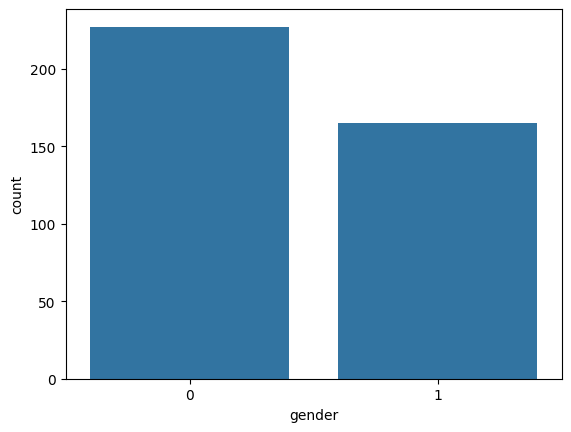

In [418]:
sns.countplot(x= X_train.gender)

<Axes: xlabel='age', ylabel='Count'>

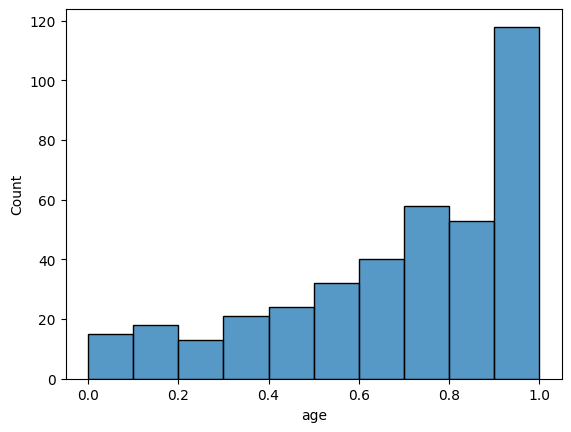

In [419]:
sns.histplot(x= X_train.age, bins = 10)

<Axes: xlabel='hypertension', ylabel='count'>

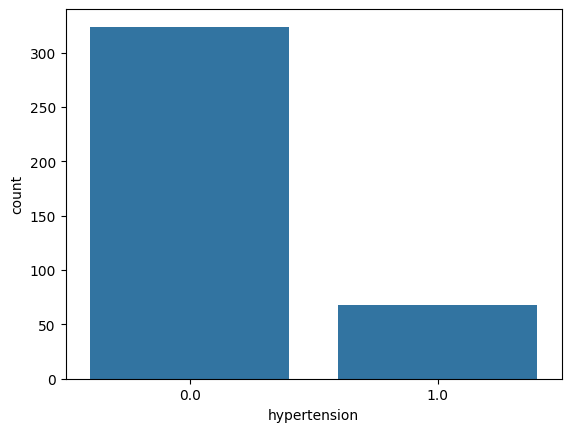

In [420]:
sns.countplot(x=X_train.hypertension)

<Axes: xlabel='heart_disease', ylabel='count'>

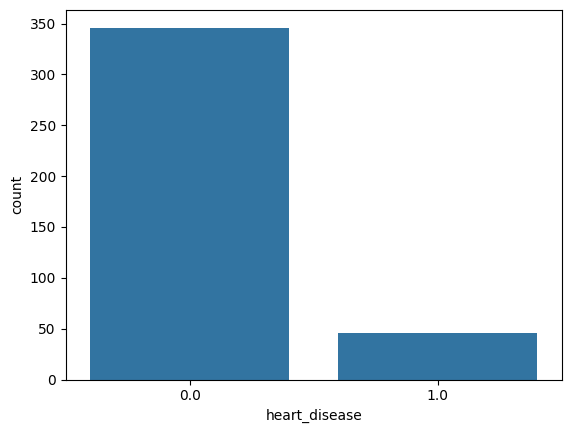

In [421]:
sns.countplot(x=X_train.heart_disease)

<Axes: xlabel='ever_married', ylabel='count'>

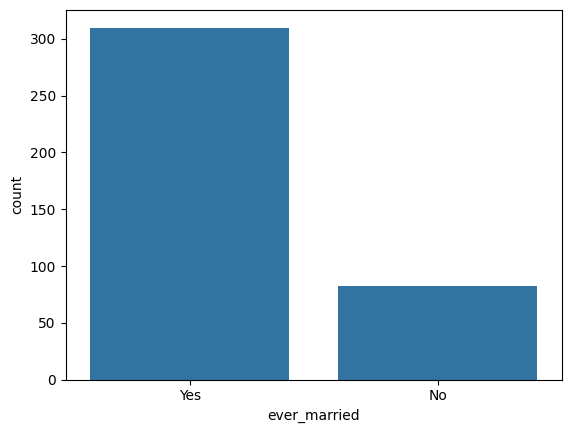

In [422]:
sns.countplot(x=X_train.ever_married)

<Axes: xlabel='Residence_type', ylabel='count'>

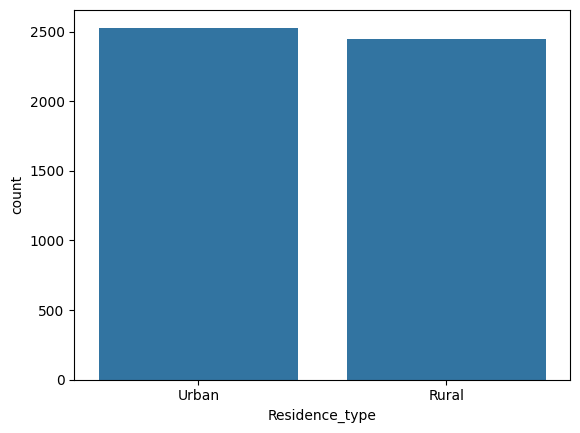

In [423]:
sns.countplot(x=df.Residence_type)


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

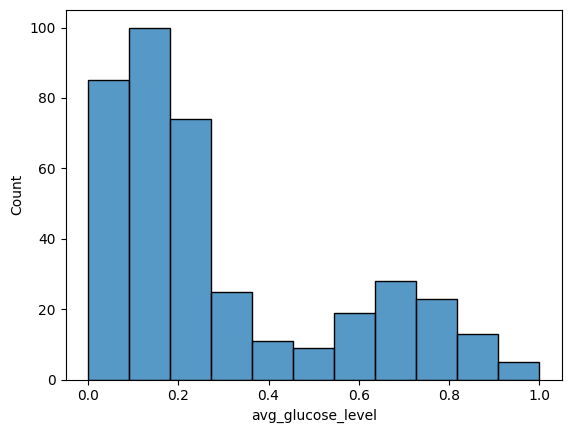

In [424]:
sns.histplot(x= X_train.avg_glucose_level)

<Axes: xlabel='bmi', ylabel='Count'>

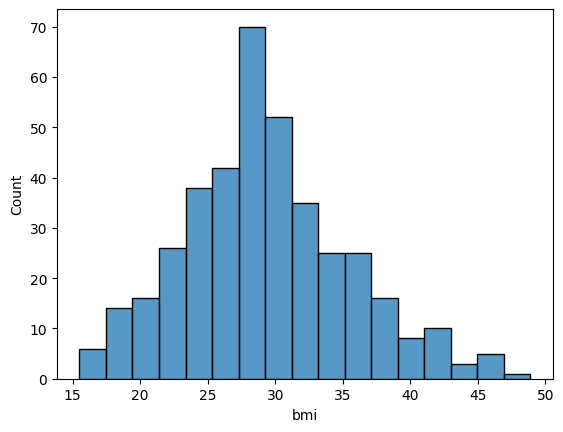

In [425]:
sns.histplot(x= X_train.bmi)

In [426]:
num_columns = X_train.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_columns = X_train.select_dtypes(exclude=['int64', 'float64'])
num_columns.columns, cat_columns.columns


(Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
        'bmi'],
       dtype='object'),
 Index(['ever_married', 'work_type_Private', 'work_type_Self-employed',
        'work_type_children', 'smoking_status_formerly smoked',
        'smoking_status_never smoked', 'smoking_status_smokes',
        'Residence_type_Urban'],
       dtype='object'))

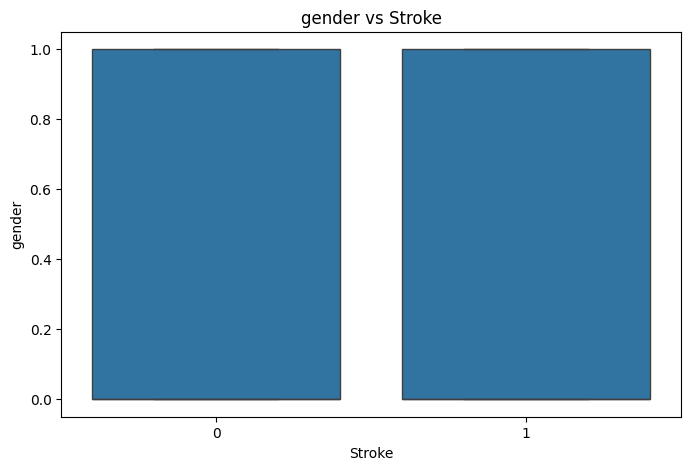

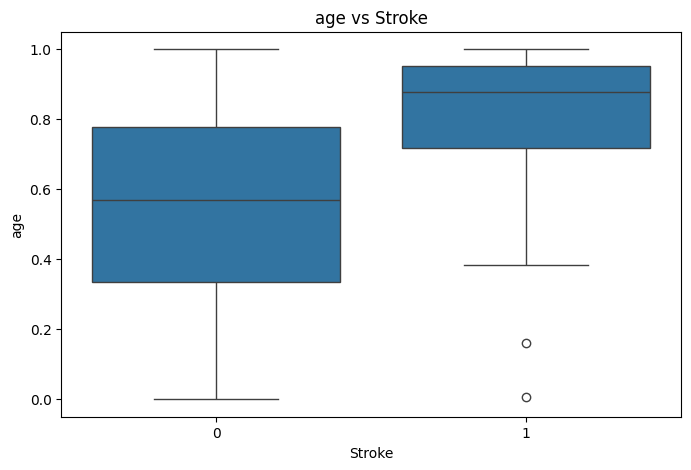

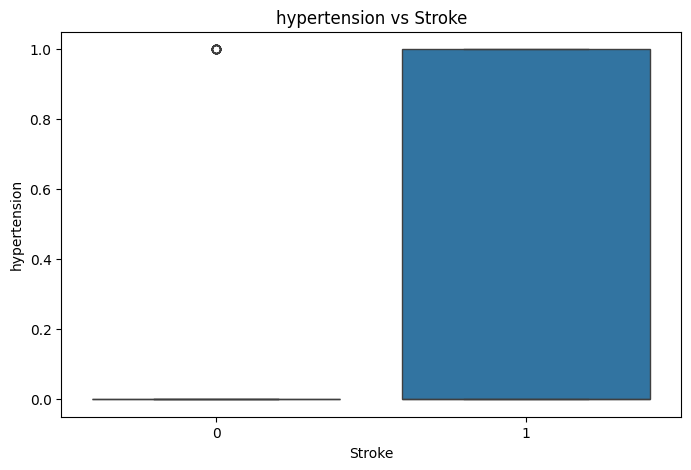

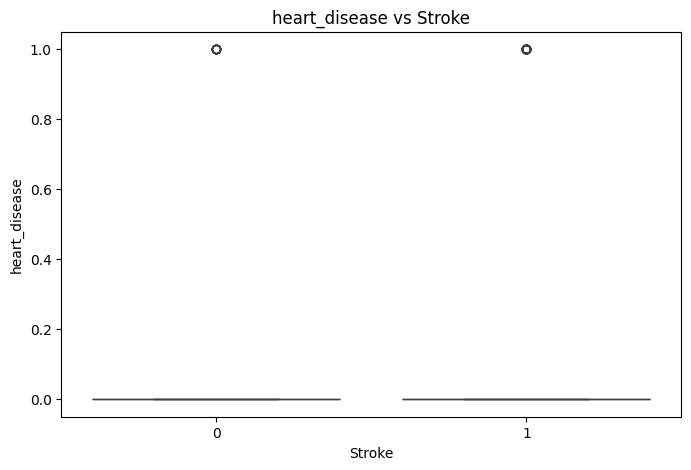

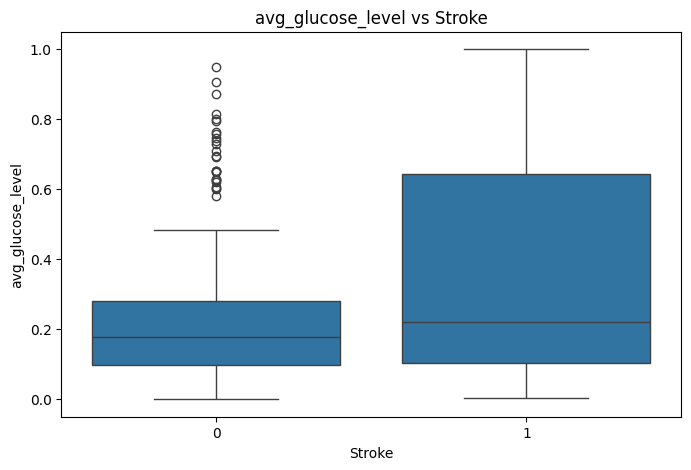

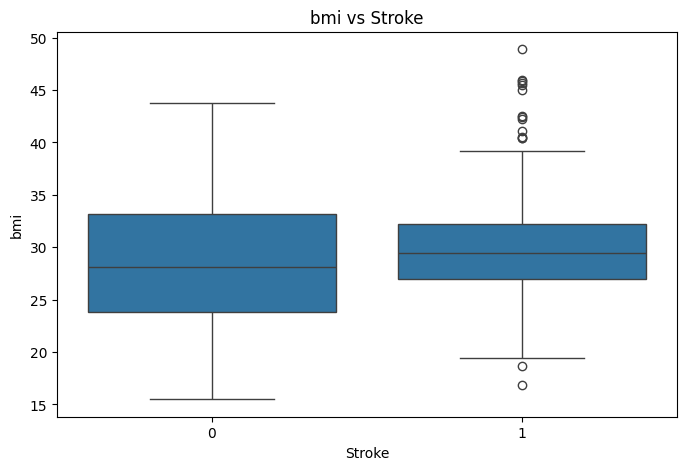

In [427]:
for col in num_columns.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=y_train, y=num_columns[col])
    plt.xlabel('Stroke')
    plt.ylabel(col)
    plt.title(f'{col} vs Stroke')
    plt.show()

In [428]:
X_train.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [429]:
X_train['ever_married'] = X_train['ever_married'].map({'Yes': 1, 'No': 0})
X_test['ever_married']  = X_test['ever_married'].map({'Yes': 1, 'No': 0})

In [430]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,stroke
4513,1,0.802761,0.0,0.0,1,0.058481,31.1,True,False,False,True,False,False,False,0
3844,0,0.950690,0.0,0.0,1,0.710135,31.4,False,True,False,True,False,False,False,0
4732,0,0.741124,0.0,0.0,1,0.300120,22.7,False,False,False,False,False,False,False,0
3423,1,0.950690,0.0,1.0,1,0.213738,24.1,False,True,False,True,False,False,True,0
1403,1,0.679487,0.0,0.0,1,0.195122,36.3,True,False,False,True,False,False,False,0


<Axes: >

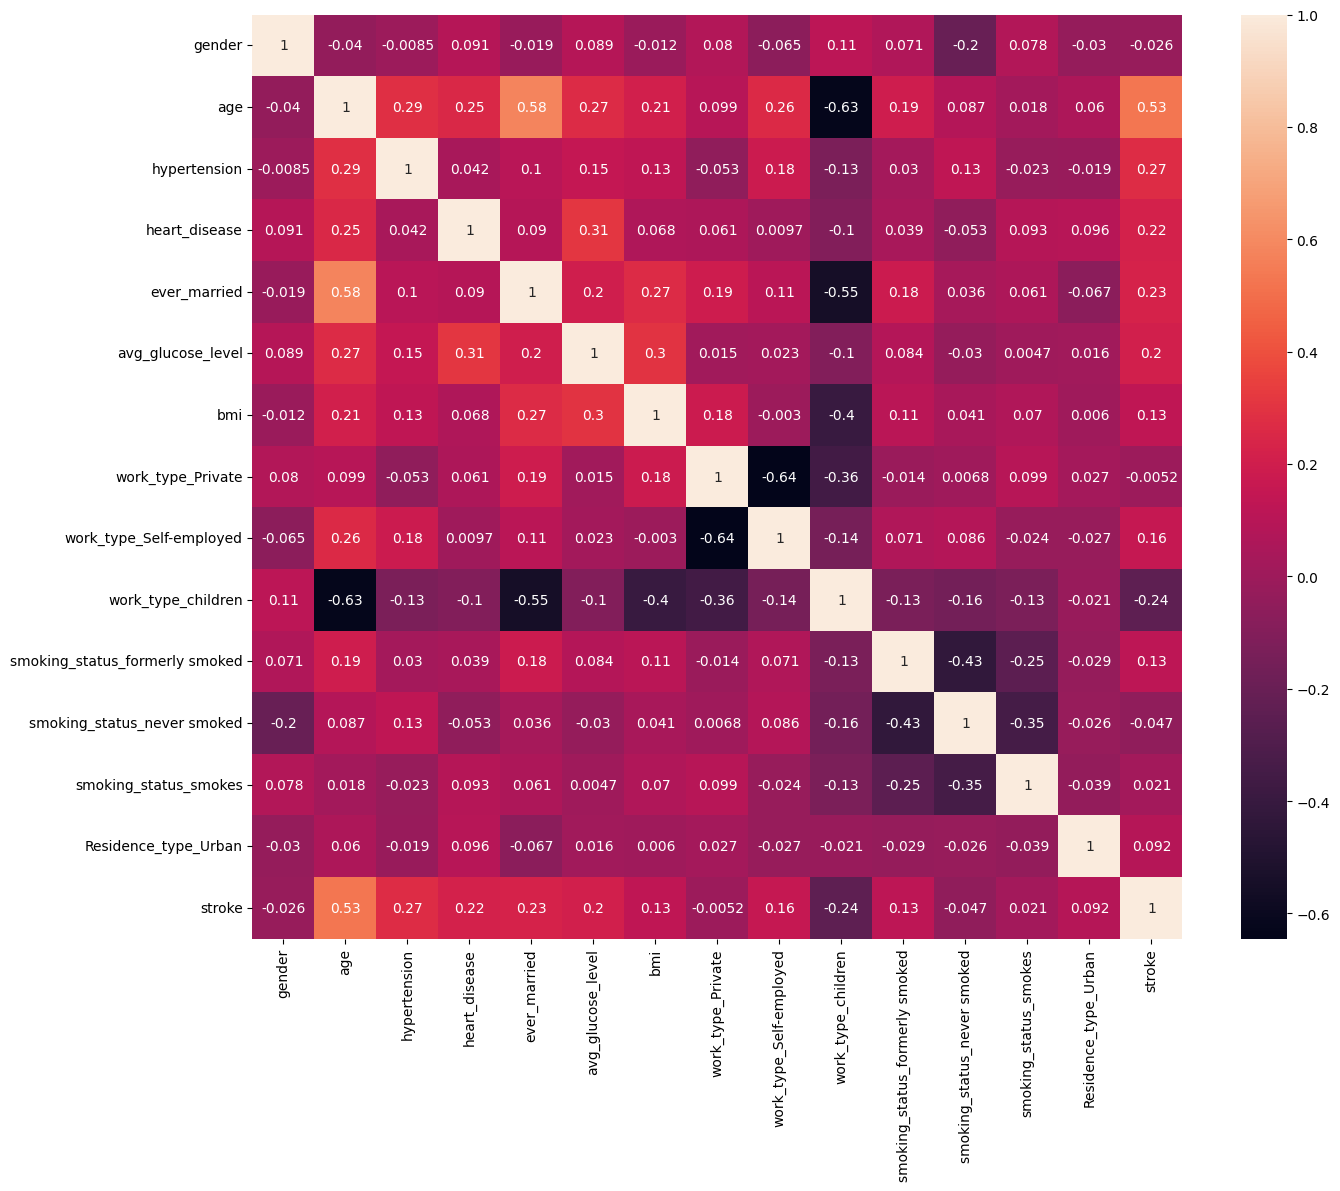

In [431]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_train.corr(), annot=True) 

In [432]:
# X_train = X_train[['age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','work_type_Self-employed','work_type_children','smoking_status_smokes']]
# X_test = X_test[['age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','work_type_Self-employed','work_type_children','smoking_status_smokes']]


X_train = X_train[['age','hypertension','heart_disease','ever_married','avg_glucose_level','work_type_Self-employed','work_type_children','smoking_status_smokes']]
X_test = X_test[['age','hypertension','heart_disease','ever_married','avg_glucose_level','work_type_Self-employed','work_type_children','smoking_status_smokes']]

In [433]:
X_train.shape

(392, 8)

In [434]:
y_train.shape

(392,)

## Modeling

In [435]:
#3. perform cross validation with a selected set of models, to scope down which model is among the best
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance
from sklearn.ensemble import GradientBoostingClassifier  #<<-------is the MOST complex

lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [0.72151899 0.72151899 0.76923077 0.76923077 0.73076923] - Scores mean:  0.7424537487828627 - Scores std (lower better):  0.02212272172467416
Scores:  [0.69620253 0.65822785 0.75641026 0.73076923 0.69230769] - Scores mean:  0.7067835118468031 - Scores std (lower better):  0.03381504831671671
Scores:  [0.73417722 0.70886076 0.74358974 0.73076923 0.76923077] - Scores mean:  0.7373255436546576 - Scores std (lower better):  0.019597575196919882


In [436]:
#4. grid search to find the best version of that model
#remind you: grid search is BASICALLY same as cross validation but for the same model

from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999)  #<----this is the model I choose, after cross validation

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  #this is listed in the sklearn website

#add more parameters here
#param_grid[parameter] = list of parameters to search

#refit means it will pick the best model, and fit again, so it means grid is already the best model after this line
grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)
#scoring = f1, recall, precision, accuracy

#fit the grid, which will basically do cross validation across all combinatiosn, here we only have 3 comb
grid.fit(X_train, y_train)  #remember to use only training set here....

#print the best parameters and accuracy
# print(grid.best_params_)
# print(grid.best_score_)
print(grid.cv_results_)

#this score is cross-validation score, basically the accuracy/precision/etc on the validation set


{'mean_fit_time': array([0.00600057, 0.00411277, 0.00702176]), 'std_fit_time': array([0.00208816, 0.0003575 , 0.00762796]), 'mean_score_time': array([0.00292859, 0.00190177, 0.00265489]), 'std_score_time': array([0.00154293, 0.00011303, 0.00065584]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.72151899, 0.72151899, 0.75949367]), 'split1_test_score': array([0.72151899, 0.72151899, 0.72151899]), 'split2_test_score': array([0.76923077, 0.76923077, 0.75641026]), 'split3_test_score': array([0.76923077, 0.76923077, 0.76923077]), 'split4_test_score': array([0.73076923, 0.73076923, 0.75641026]), 'mean_test_score': array([0.74245375, 0.74245375, 0.75261279]), 'std_test_score': array([0.02212272, 0.02212272, 0.01624297]), 'rank_test_score': array([2, 2, 1], dt

## Testing

In [437]:
from sklearn.metrics import classification_report

pred_y = grid.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       945
           1       0.15      0.73      0.25        52

    accuracy                           0.77       997
   macro avg       0.56      0.75      0.55       997
weighted avg       0.94      0.77      0.83       997



In [440]:
grid.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,999
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [441]:
grid.best_estimator_.coef_

array([[ 3.27997849,  0.88396153,  0.75052057, -0.2429654 ,  0.36052034,
         0.1884412 , -0.37210262,  0.06189087]])

<Axes: ylabel='features'>

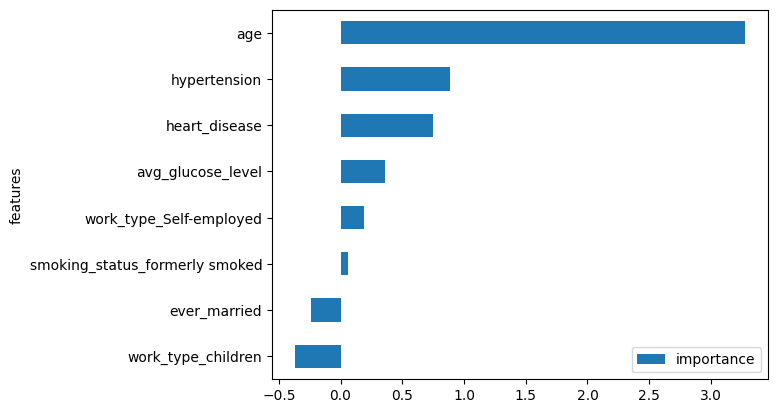

In [447]:
feature_importance = pd.DataFrame(['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked'], 
                                  columns=['features'])
feature_importance["importance"] = grid.best_estimator_.coef_[0]

feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features', y='importance')

## Inference

In [448]:
#step 1: save your model
import pickle

filename = 'stroke.model'
pickle.dump(grid, open(filename, 'wb'))

In [449]:
#step 2: load your model
filename = 'stroke.model'
loaded_model = pickle.load(open(filename, 'rb'))

In [450]:
sample = X_train[['age','hypertension','heart_disease','ever_married','avg_glucose_level','work_type_Self-employed','work_type_children','smoking_status_smokes']].loc[13]
sample

age                        0.778107
hypertension                    0.0
heart_disease                   1.0
ever_married                      1
avg_glucose_level           0.62985
work_type_Self-employed       False
work_type_children            False
smoking_status_smokes          True
Name: 13, dtype: object

In [455]:

# Example feature values for one sample:
sample = np.array([[0.778107, 0, 0, 0, 0.62985, 0, 0, 1]])

# Pass sample to model for inference
pred = loaded_model.predict(sample)
print("Prediction:", pred)


Prediction: [1]


/Users/nabin/Desktop/AIT Data Science/First Semester/ML/Lecture Notes/GitHub/Python-for-Machine-Learning/VenvML/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
